In [1]:
import astra 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def create_image(x,y):
    if x== 256 and y == 256:
        x = 80
        y = 80
    else:
        x = 164
        y = 164

    image = np.ones([x,y])
    # Resize Image
    diag = len(np.diag(image)//2)
    if x == 80 and y == 80:
        plus = 8
    else: 
        plus = 10
    
    image = np.pad(image, pad_width=diag+plus)
    
    _ = np.linspace(-1, 1, image.shape[0])
    xv, yv = np.meshgrid(_,_)
    return image, xv, yv

In [83]:
def create_circles(x, y, n, overlap):
    circles = []
    np.random.seed(0)
    for i in range(n):
        
        image, xv, yv = create_image(x,y)
        mu, sigma = 0 , 0.1
        noise =  np.abs(np.random.normal(mu, sigma, 2))
        
        image[xv**2 + yv**2 >0.6] = 0
        image[xv**2 + yv**2 <0.49] = 50
        if overlap == True:
            image[(xv-0.1+noise[0])**2 + (yv-0.1+noise[0])**2 <0.3] = 160
            image[(xv-0.1+noise[1])**2 + (yv-0.1+noise[1])**2 <0.19] = 40
            image[(xv-0.1+noise[0])**2 + (yv-0.1+noise[0])**2 <0.11] = 80
            image[(xv-0.2+noise[1])**2 + (yv-0.2+noise[1])**2 <0.02] = 40
        else: 
            image[(xv-0.1+noise[0])**2 + (yv-0.1+noise[0])**2 <0.3] = 160
            image[(xv-0.1+noise[0])**2 + (yv-0.1+noise[0])**2 <0.19] = 40
            image[(xv-0.1+noise[0])**2 + (yv-0.1+noise[0])**2 <0.11] = 80
            image[(xv-0.2+noise[0])**2 + (yv-0.2+noise[0])**2 <0.02] = 40
            
        circles.append(image)

        
    return circles

In [84]:
circles = create_circles(512,512,10, overlap = True)

In [85]:
for i in range(10):
    img = Image.fromarray(circles[i].astype(np.uint8))
    img.save(f"circles{i}.png")

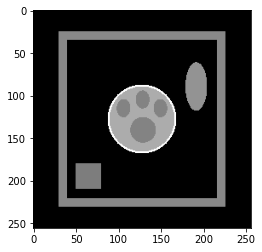

In [19]:
image = np.ones([80,80])
# Resize Image
diag = len(np.diag(image)//2)
image = np.pad(image, pad_width=diag+8)

_ = np.linspace(-1, 1, image.shape[0])
xv, yv = np.meshgrid(_,_)

image[xv**2 + yv**2 >0.1] = 255
image[xv**2 + yv**2 <0.09] = 110
image[25:231,30:40] = 140
image[25:231, 216:226] = 140
image[25:35, 40:216] = 140
image[221:231, 40:216] = 140

image[180:210,50:80] = 150
image[(xv-0.5)**2/0.2+(yv+0.3)**2<0.05] = 130
image[(xv-0.006)**2/0.4+(yv+0.18)**2/0.7<0.01] = 144
image[(xv+0.17)**2/0.4+(yv+0.1)**2/0.7<0.01] = 144
image[(xv-0.17)**2/0.4+(yv+0.1)**2/0.7<0.01] = 144
image[(xv-0.01)**2/0.7+(yv-0.1)**2/0.7<0.02] = 144
# image[(xv-0.2)**2 - (yv-0.1)**2 <0.02] =24


plt.imshow(image, cmap = 'Greys')


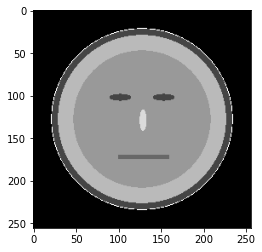

In [20]:
image, xv, yv = create_image(80,80)


image[xv**2 + yv**2 >0.7] = 255
image[xv**2 + yv**2 <0.69] = 200
image[xv**2 + yv**2 <0.6] = 98
# image[xv**2 + yv**2 <0.5] = 190
image[xv**2 + yv**2 <0.4] = 125

image[(xv+0.2)**2+(yv+0.2)**2/0.1<0.01] = 200
image[(xv-0.2)**2+(yv+0.2)**2/0.1<0.01] = 200
image[(xv-0.01)**2/0.1+(yv-0.01)**2<0.01] = 60

image[170:175,100:160] = 170

plt.imshow(image, cmap = 'Greys')

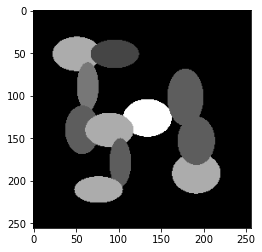

In [21]:
image, xv, yv = create_image(80,80)

image[(xv-0.05)**2+(yv+0.01)**2/0.6>0.05] = 255
image[(xv+0.6)**2+(yv+0.6)**2/0.5<0.05] = 110
image[(xv+0.25)**2+(yv+0.6)**2/0.35<0.05] = 200
image[(xv+0.5)**2/0.2+(yv+0.3)**2<0.05] = 155
image[(xv+0.55)**2/0.5+(yv-0.1)**2<0.05] = 180
image[(xv+0.3)**2+(yv-0.1)**2/0.5<0.05] = 110
image[(xv+0.2)**2/0.2+(yv-0.4)**2<0.05] = 180
image[(xv+0.4)**2+(yv-0.65)**2/0.3<0.05] = 110
image[(xv-0.5)**2+(yv-0.5)**2/0.7<0.05] = 110
image[(xv-0.5)**2/0.6+(yv-0.2)**2<0.05] = 180
image[(xv-0.4)**2/0.4+(yv+0.2)**2<0.07] = 180


plt.imshow(image, cmap = 'Greys')


In [100]:
def create_alien(x, y, n, overlap):
    aliens = []
    np.random.seed(0)

    for i in range(n):
        
        image, xv, yv = create_image(x,y)
        mu, sigma = 0 , 0.1
        noise =  np.abs(np.random.normal(mu, sigma, 2))
        image[(xv-0.01)**2/0.5+(yv+0.01)**2>0.5] = 0
        image[(xv-0.01)**2/0.5+(yv+0.01)**2<0.48] = 100

        if overlap == True:
            image[(xv+0.3-noise[0])**2/0.2+(yv+0.01-noise[0])**2<0.05] = 80
            image[(xv+0.3-noise[1])**2/0.2+(yv+0.1-noise[1])**2<0.01] = 40
            image[(xv-0.3+noise[0])**2/0.2+(yv+0.01+noise[0])**2<0.05] = 80
            image[(xv-0.3+noise[1])**2/0.2+(yv+0.1+noise[1])**2<0.01] = 40
            image[(xv+0.08-noise[0])**2+(yv-0.5-noise[0])**2/0.025<0.01] = 160
            image[(xv-0.08-noise[1])**2+(yv-0.5-noise[1])**2/0.025<0.01] = 160
            
        else: 
            image[(xv+0.3-noise[0])**2/0.2+(yv+0.01-noise[0])**2<0.05] = 80
            image[(xv+0.3-noise[0])**2/0.2+(yv+0.1-noise[0])**2<0.01] = 40
            image[(xv-0.3+noise[0])**2/0.2+(yv+0.01-noise[0])**2<0.05] = 80
            image[(xv-0.3+noise[0])**2/0.2+(yv+0.1-noise[0])**2<0.01] = 40
            image[(xv-0.01-noise[0])**2+(yv-0.6+noise[0])**2/0.025<0.02] = 40
           
            
        aliens.append(image)
        
    return aliens





In [101]:
aliens = create_alien(164,164,10, overlap = False)
for i in range(10):
    img = Image.fromarray(aliens[i].astype(np.uint8))
    img.save(f"aliens{i}.png")

(-0.5, 511.5, 511.5, -0.5)

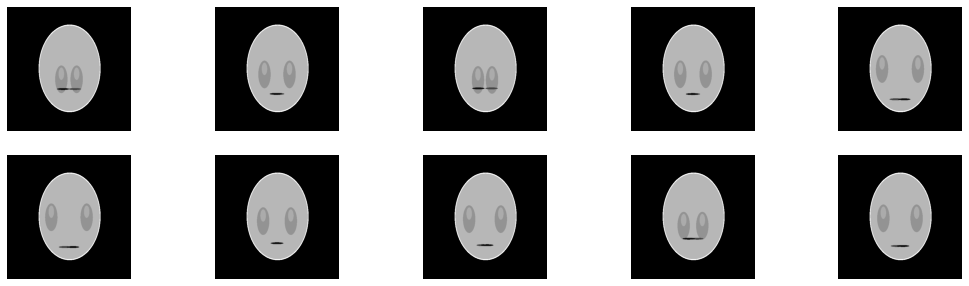

In [23]:


fig, ax = plt.subplots(2,5,figsize=(18,5))
ax[0][0].imshow(aliens[0], cmap='Greys')
ax[0][0].axis('off')
ax[0][1].imshow(aliens[1], cmap='Greys')
ax[0][1].axis('off')
ax[0][2].imshow(aliens[2], cmap='Greys')
ax[0][2].axis('off')
ax[0][3].imshow(aliens[3], cmap='Greys')
ax[0][3].axis('off')
ax[0][4].imshow(aliens[4], cmap='Greys')
ax[0][4].axis('off')
ax[1][0].imshow(aliens[5], cmap='Greys')
ax[1][0].axis('off')
ax[1][1].imshow(aliens[6], cmap='Greys')
ax[1][1].axis('off')
ax[1][2].imshow(aliens[7], cmap='Greys')
ax[1][2].axis('off')
ax[1][3].imshow(aliens[8], cmap='Greys')
ax[1][3].axis('off')
ax[1][4].imshow(aliens[9], cmap='Greys')
ax[1][4].axis('off')
